Dữ liệu mẫu:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

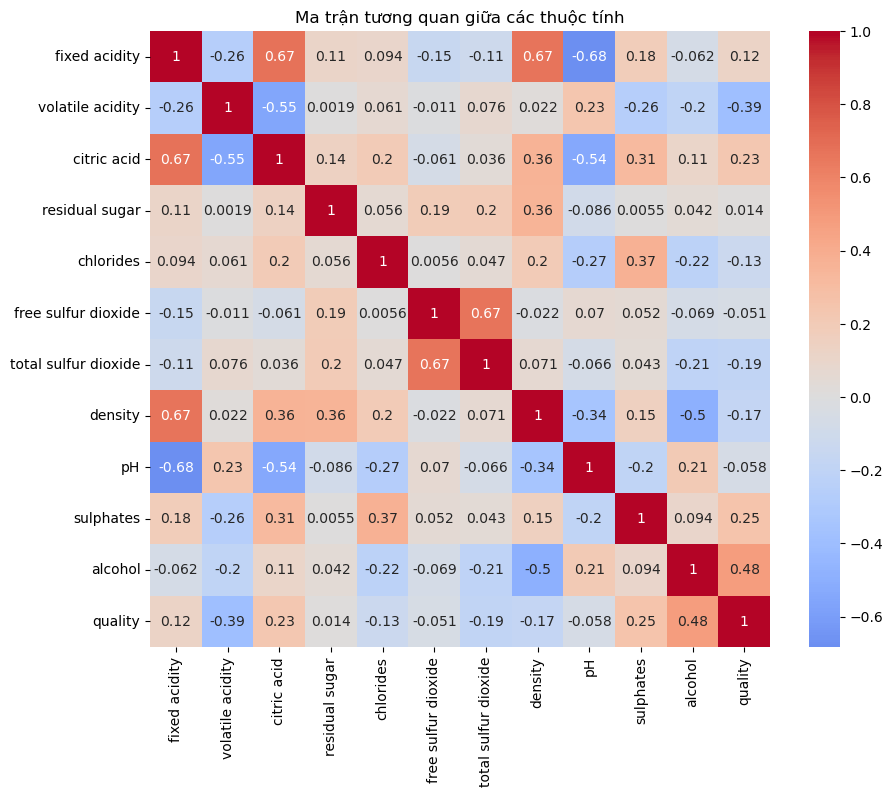

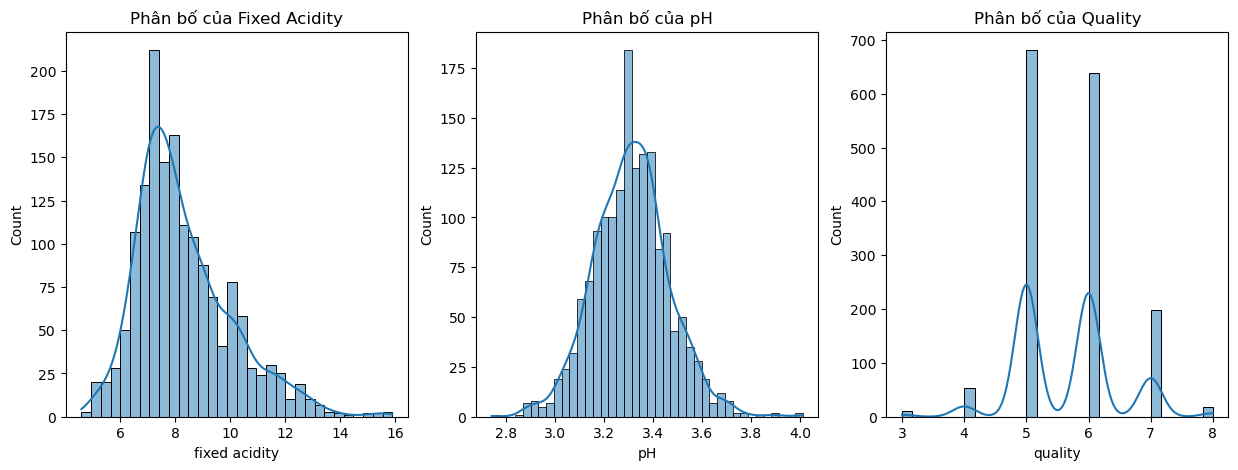

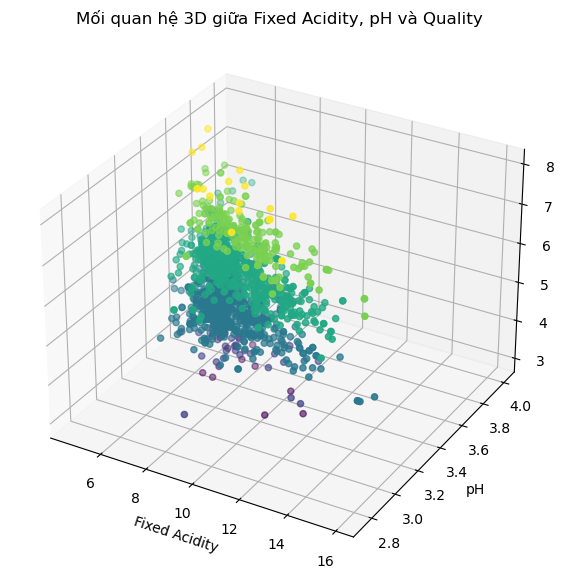

Hệ số hồi quy: [0.07356557 0.26464097]
Độ chệch (Intercept): 4.147727410711218


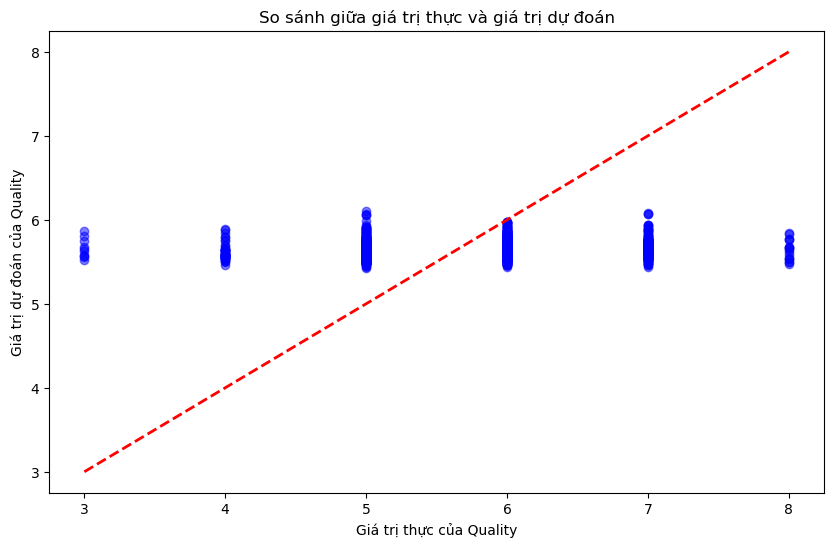

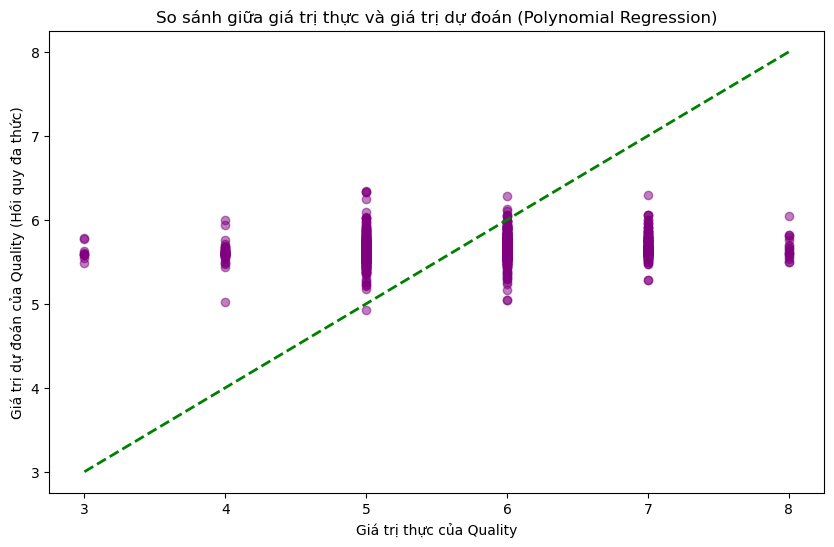

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Đọc dữ liệu
file_path = r"C:\Users\Admin\OneDrive - National Economics University\Documents\Học liệu\Junior - Third year\Semester 1\Python Programing\winequality-red.csv"
wine_data = pd.read_csv(file_path)

# Xem qua dữ liệu
print("Dữ liệu mẫu:\n", wine_data.head())
print("\nTên các cột dữ liệu:", wine_data.columns)

# 1. Phân tích ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()

# 2. Biểu đồ phân bố của fixed acidity, pH và quality
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(wine_data['fixed acidity'], kde=True)
plt.title("Phân bố của Fixed Acidity")

plt.subplot(1, 3, 2)
sns.histplot(wine_data['pH'], kde=True)
plt.title("Phân bố của pH")

plt.subplot(1, 3, 3)
sns.histplot(wine_data['quality'], kde=True)
plt.title("Phân bố của Quality")
plt.show()

# 3. Trực quan hóa 3D giữa fixed acidity, pH và quality
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wine_data['fixed acidity'], wine_data['pH'], wine_data['quality'], c=wine_data['quality'], cmap='viridis')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('pH')
ax.set_zlabel('Quality')
ax.set_title("Mối quan hệ 3D giữa Fixed Acidity, pH và Quality")
plt.show()

# 4. Mô hình hồi quy tuyến tính đa biến (Linear Regression) để dự đoán Quality từ Fixed Acidity và pH
X = wine_data[['fixed acidity', 'pH']]
y = wine_data['quality']

# Tạo mô hình hồi quy tuyến tính
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Dự đoán và in kết quả của mô hình hồi quy tuyến tính
y_pred = lin_reg.predict(X)
print("Hệ số hồi quy:", lin_reg.coef_)
print("Độ chệch (Intercept):", lin_reg.intercept_)

# Vẽ biểu đồ so sánh giữa giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Giá trị thực của Quality")
plt.ylabel("Giá trị dự đoán của Quality")
plt.title("So sánh giữa giá trị thực và giá trị dự đoán")
plt.show()

# 5. Mô hình hồi quy đa thức (Polynomial Regression) cho Fixed Acidity và pH
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Tạo và huấn luyện mô hình hồi quy đa thức
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# Dự đoán giá trị với mô hình đa thức
y_poly_pred = poly_reg_model.predict(X_poly)

# Biểu đồ so sánh giữa giá trị thực và giá trị dự đoán (mô hình đa thức)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_poly_pred, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linestyle='--', linewidth=2)
plt.xlabel("Giá trị thực của Quality")
plt.ylabel("Giá trị dự đoán của Quality (Hồi quy đa thức)")
plt.title("So sánh giữa giá trị thực và giá trị dự đoán (Polynomial Regression)")
plt.show()
